`pip install pandas scikit-learn seaborn matplotlib nltk`


In [2]:
import pandas as pd

In [8]:
df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

In [11]:
with pd.option_context('display.max_colwidth', 2500):
    display(df)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,U.S. NEWS,Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlines-passenger-banned-flight-attendant-punch-justice-department_n_632e25d3e4b0e247890329fe,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",U.S. NEWS,"He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.",Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets-cats-dogs-september-17-23_n_632de332e4b0695c1d81dc02,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),COMEDY,"""Until you have a dog you don't understand what could be eaten.""",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parenting-tweets_l_632d7d15e4b0d12b5403e479,The Funniest Tweets From Parents This Week (Sept. 17-23),PARENTING,"""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce.""",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-loses-discrimination-lawsuit-franklin-templeton_n_632c6463e4b09d8701bd227e,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,U.S. NEWS,Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0fa920b95c4e1,RIM CEO Thorsten Heins' 'Significant' Plans For BlackBerry,TECH,Verizon Wireless and AT&T are already promoting LTE devices including smartphones and tablets from RIM's rivals. RIM's first,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sharapova-stunned-victoria-azarenka-australian-open_us_5bb69b21e4b097869fd1b2f1,Maria Sharapova Stunned By Victoria Azarenka In Australian Open Final,SPORTS,"Afterward, Azarenka, more effusive with the press than normal, credited her coach of two years, Sam Sumyk, for his patient",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bowl-upsets-the-mos_us_5bb69b1de4b097869fd1b26d,"Giants Over Patriots, Jets Over Colts Among Most Improbable Super Bowl Upsets Of All Time (VIDEOS)",SPORTS,"Leading up to Super Bowl XLVI, the most talked about game could end up being one that occurred a few years ago. After all",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smith-arrested-dui-49ers_us_5bb69b25e4b097869fd1b33c,Aldon Smith Arrested: 49ers Linebacker Busted For DUI,SPORTS,CORRECTION: An earlier version of this story incorrectly stated the location of KTVU and the 2011 league leader in sacks,,2012-01-28


In [12]:
df['category'] = df['category'].astype('category')


In [20]:
df['headline'] = df['headline'].dropna()

In [21]:
df['short_description'] = df['short_description'].dropna()

In [25]:
df['full_text'] = (df['headline'] + ' ' + df['short_description'])

In [26]:
df['full_text'] = [e.lower() for e in df['full_text']]

In [36]:
import nltk

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [37]:
from nltk.tokenize import word_tokenize

df['tokenized'] = [word_tokenize(e) for e in df['full_text']]

In [42]:
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

stopword_list = stopwords.words('english')

In [44]:
from nltk import pos_tag, WordNetLemmatizer, word_tokenize

for i,e in enumerate(df['tokenized']):
    tokenized = []
    for word, tag in pos_tag(e):
        if word not in stopword_list and word.isalpha():
            tokenized.append(WordNetLemmatizer().lemmatize(word, tag_map[tag[0]]))
    df.loc[i, 'processed_text'] = str(tokenized)


In [45]:
from sklearn.model_selection import train_test_split

x = df['processed_text']
y = df['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
from sklearn.preprocessing import LabelEncoder

y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
train_x_tfidf = tfidf_vect.fit_transform(x_train, y_train_encoded)


In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_x_tfidf, y_train_encoded)

In [ ]:
predictions = svm_model.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, f1_score

category_names = pd.unique(y_train).sort_values()
mat = confusion_matrix(y_test_encoded, predictions)
f1_score_result = f1_score(y_test_encoded, predictions, average='micro')

0.41643201450866224
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  0]]


Text(162.5, 0.5, 'predicted label')

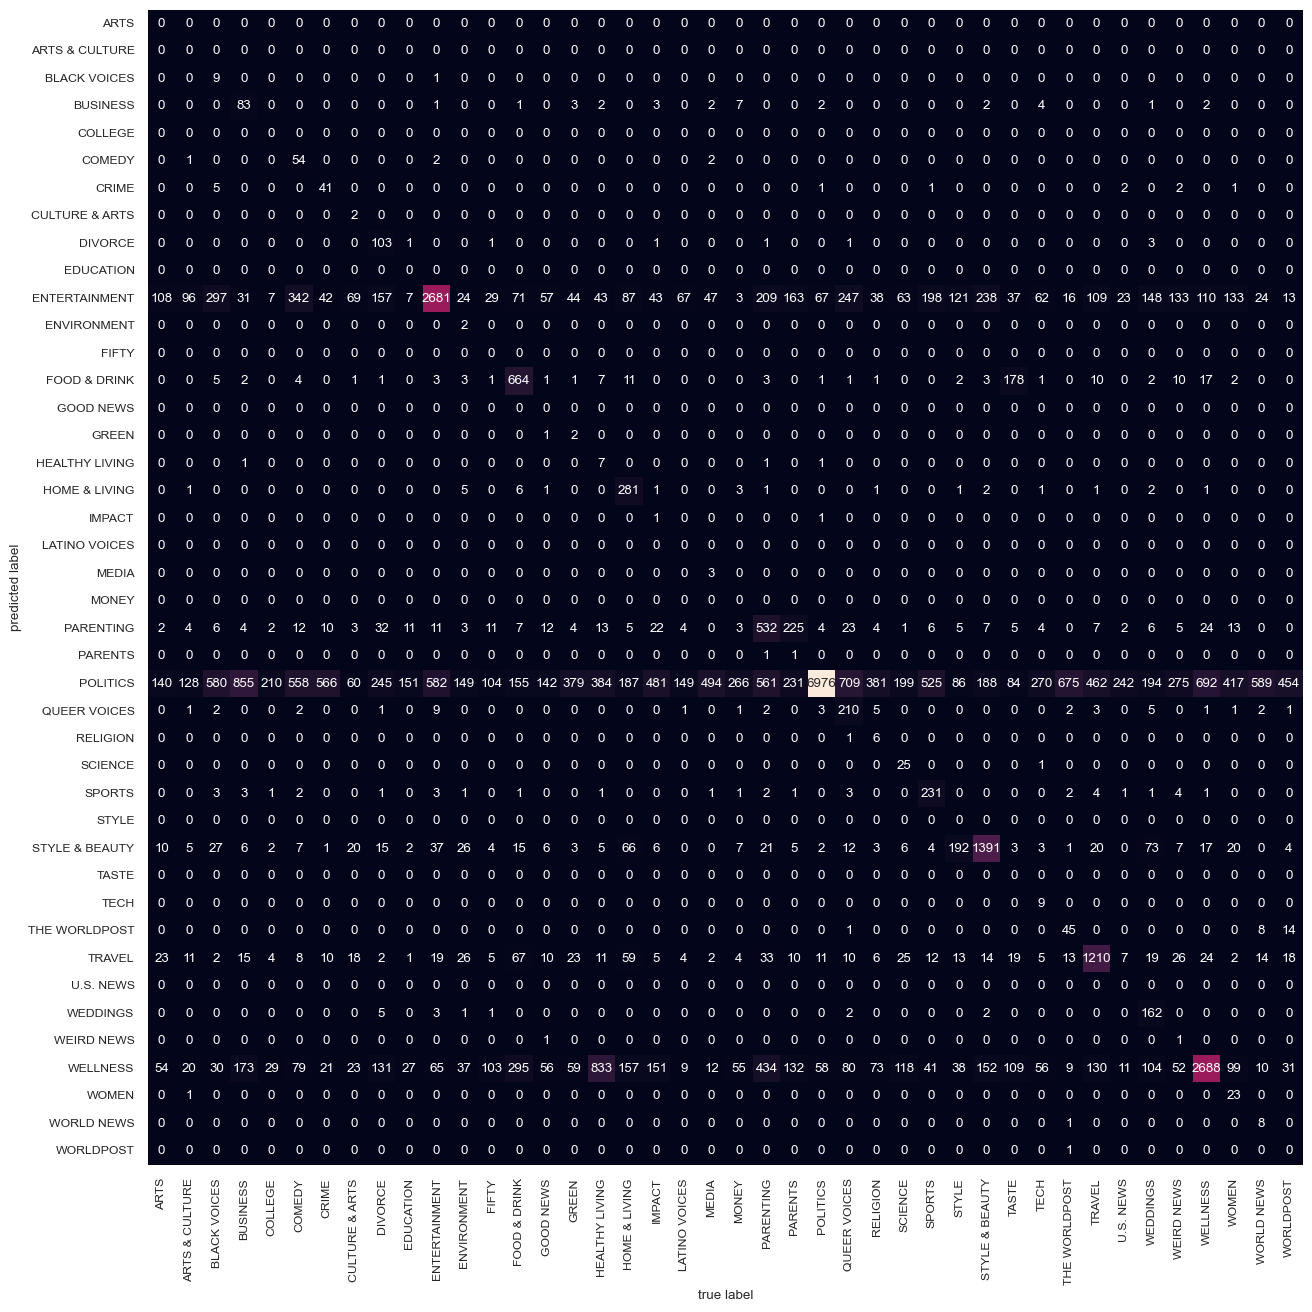

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

print(f1_score_result)

print(mat)

plt.rcParams.update({'font.size': 8, 'figure.figsize': [15, 15]})
sns.set(font_scale=0.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=category_names, yticklabels=category_names)
plt.xlabel('true label')
plt.ylabel('predicted label')